Import Libraries and Load Data

In [5]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file (replace 'TimeBasedFeatures-Dataset-15s-VPN copy.arff' with the actual path)
arff_file_path = '/content/TimeBasedFeatures-Dataset-15s-VPN.arff'
data, meta = arff.loadarff(arff_file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Inspect the first few rows of the dataset
df.head()


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'


2: Decode Byte Strings and Inspect Data

In [14]:
from itertools import count
# Check if the column needs decoding (if it's of type bytes)
if df['class1'].dtype == object and isinstance(df['class1'].iloc[0], bytes):
  df['class1'] = df['class1'].apply(lambda x: x.decode('utf-8'))
else:
  print("The 'class1' column does not need decoding.")

#maintain same count between both the classes
vpn_rows = df[df['class1'] == 'VPN']
rows_to_delete = vpn_rows.sample(n=700, random_state=42)  # Use random_state for reproducibility
#print(vpn_rows)
# Drop these rows from the original DataFrame
df = df.drop(rows_to_delete.index)
count = df['class1'].value_counts()
head=df.head()
unique=df['class1'].unique()

#print(head)
print(unique)
print(count)

The 'class1' column does not need decoding.
['Non-VPN' 'VPN']
class1
VPN        8993
Non-VPN    8965
Name: count, dtype: int64


3: Check and Handle Missing Values

In [15]:
# Handle missing values (if any)
# Select only numeric columns before calculating the mean
numeric_df = df.select_dtypes(include=['number'])

# Fill missing values in numeric columns with the mean of those columns
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())

# Verify that there are no missing values in numeric columns
print(df.isnull().sum())

duration              0
total_fiat            0
total_biat            0
min_fiat              0
min_biat              0
max_fiat              0
max_biat              0
mean_fiat             0
mean_biat             0
flowPktsPerSecond     0
flowBytesPerSecond    0
min_flowiat           0
max_flowiat           0
mean_flowiat          0
std_flowiat           0
min_active            0
mean_active           0
max_active            0
std_active            0
min_idle              0
mean_idle             0
max_idle              0
std_idle              0
class1                0
dtype: int64


4: Normalize Features

In [16]:
from sklearn.preprocessing import StandardScaler

# Select features and target
features = df.drop('class1', axis=1)
target = df['class1']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Verify normalization
features_scaled_df.describe()


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,...,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04,1.795800e+04
mean,6.330707e-18,-1.582677e-17,-3.165354e-17,-3.165354e-18,-6.330707e-18,-3.481889e-17,1.899212e-17,-9.496061e-18,-1.899212e-17,9.496061e-18,...,-1.582677e-17,1.028740e-17,-4.431495e-17,-3.165354e-18,2.215747e-17,2.848818e-17,-2.215747e-17,-7.913384e-18,9.496061e-18,-1.266141e-17
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-6.731978e-01,-2.688480e-01,-2.668060e-01,-3.076461e-01,-2.904352e-01,-3.156413e-01,-3.674752e-01,-1.937709e-01,-2.414101e-01,-1.103111e-01,...,-3.356778e-01,-2.894076e-01,-2.393997e-01,-2.646834e-01,-2.883459e-01,-1.757744e-01,-2.213862e-01,-2.441026e-01,-2.654035e-01,-1.601812e-01
25%,-6.505417e-01,-2.688444e-01,-2.668051e-01,-3.052506e-01,-2.879353e-01,-3.119767e-01,-3.651980e-01,-1.937316e-01,-2.414101e-01,-1.101669e-01,...,-3.289350e-01,-2.878679e-01,-2.393997e-01,-2.646834e-01,-2.883459e-01,-1.757744e-01,-2.213862e-01,-2.441026e-01,-2.654035e-01,-1.601812e-01
50%,8.674712e-02,-2.688192e-01,-2.667969e-01,-2.819747e-01,-2.622342e-01,-3.006004e-01,-3.545001e-01,-1.911868e-01,-2.377868e-01,-1.096585e-01,...,-2.777909e-01,-2.694191e-01,-2.393997e-01,-2.646834e-01,-2.883459e-01,-1.757744e-01,-2.213862e-01,-2.441026e-01,-2.654035e-01,-1.601812e-01
75%,3.488499e-01,-2.681100e-01,-2.661072e-01,8.379010e-02,1.385699e-01,-1.500870e-01,-1.728784e-01,-5.692197e-02,-3.452139e-02,-1.047645e-01,...,-1.167097e-01,-7.721729e-02,-3.906172e-02,3.971249e-02,1.063177e-01,-1.757744e-01,-7.929218e-02,-2.512974e-03,6.332080e-02,-1.601812e-01
max,4.043687e+01,1.671451e+01,1.845946e+01,2.775391e+01,6.083060e+01,4.780820e+01,1.699589e+01,4.841715e+01,3.800000e+01,5.495311e+01,...,4.240611e+01,3.756301e+01,4.368816e+01,4.321077e+01,4.186153e+01,5.864073e+01,4.388525e+01,4.342961e+01,4.208604e+01,5.922735e+01


5: Split the Data

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.3, random_state=45)

# Verify the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 12570
Testing set size: 5388


6: Train the Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Initialize the model
model = RandomForestClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the model using the best estimator found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
170 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best Parameters: {'max_depth': 29, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 186}
Best Score: 0.9110580747812251


RandomForestClassifier(max_depth=29, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=186)

7: Evaluate the Model

Accuracy: 0.9120267260579065

Classification Report:
              precision    recall  f1-score   support

     Non-VPN       0.93      0.89      0.91      2704
         VPN       0.89      0.94      0.91      2684

    accuracy                           0.91      5388
   macro avg       0.91      0.91      0.91      5388
weighted avg       0.91      0.91      0.91      5388



Confusion Matrix:


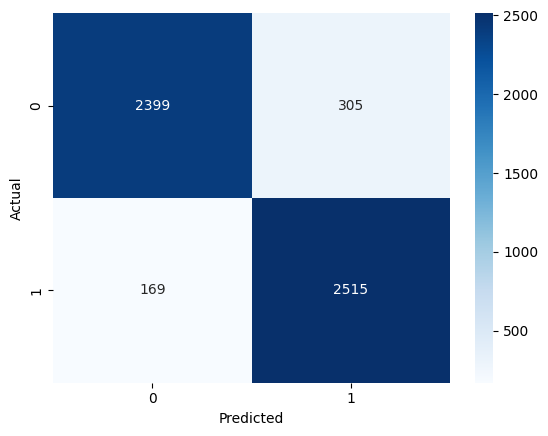

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\n")

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
import joblib
joblib.dump(best_model, 'vpn_model.pkl')

['vpn_model.pkl']